In [ ]:
from tensorflow.keras import datasets 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
plt.style.use('seaborn')
import statsmodels.api as sm
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("crop_pred.csv")

In [ ]:
df

,id,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,B,Mo,Tex,District,label
0,0,8.05,0.160,5.56,175.62,38.26,324.8,5.21,1884,288.00,1.82,0.20,2.83,2.80,0.23,0.13,LS,Almora,6
1,1,6.88,0.089,4.24,125.44,26.30,103.0,10.42,1484,336.00,1.62,0.45,6.27,5.60,0.23,0.04,LS,Almora,7
2,2,5.02,0.081,2.78,150.53,25.70,53.8,7.81,1644,504.00,2.84,0.44,21.08,24.11,0.23,0.09,Sa C L,Almora,7
3,3,5.64,0.164,10.54,188.16,24.70,190.4,10.42,1364,840.00,7.74,0.63,16.42,11.40,0.23,0.21,LS,Almora,6
4,4,7.22,0.167,11.41,163.07,40.00,210.6,10.42,2004,168.00,11.89,0.61,7.38,2.91,0.12,0.26,LS,Almora,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,855,6.34,0.750,27.28,551.71,1.63,134.6,660.00,72,2.39,0.59,43.50,9.10,1.86,1.66,0.55,ls,Chamoli,3
856,856,5.65,0.590,15.91,508.41,5.64,57.6,400.00,96,5.13,1.15,81.44,16.68,1.86,1.12,0.45,ls,Chamoli,3
857,857,6.08,0.640,24.48,509.09,2.82,74.5,460.00,60,2.52,0.83,47.46,7.92,3.10,1.08,0.64,scl,Chamoli,3
858,858,5.98,0.600,12.77,508.75,7.56,110.2,540.00,96,5.40,1.26,76.42,6.16,3.10,1.69,0.45,l,Chamoli,3


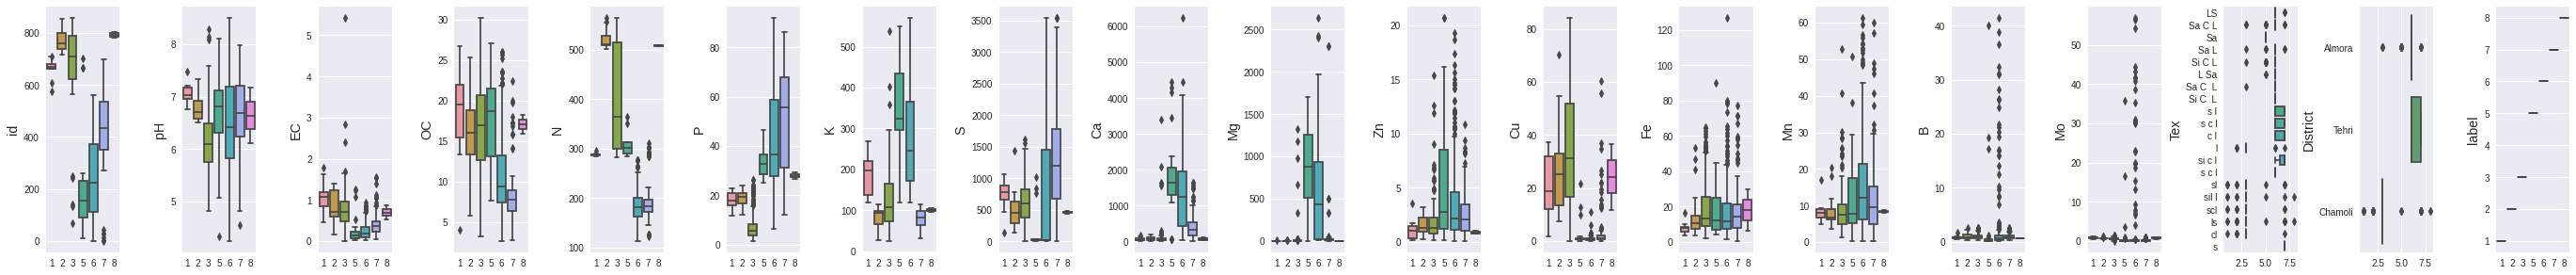

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(len(df.columns)*2,4))
for index, col in enumerate(df.columns):
    ax = axes[index]
    sns.boxplot(y=df.loc[:,col], x=df.loc[:,'label'], ax=ax)
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
    ax.set_xlabel("")
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.District= le.fit_transform(df.District.values)


In [ ]:
df

,id,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,B,Mo,Tex,District,label
0,0,8.05,0.160,5.56,175.62,38.26,324.8,5.21,1884,288.00,1.82,0.20,2.83,2.80,0.23,0.13,LS,0,6
1,1,6.88,0.089,4.24,125.44,26.30,103.0,10.42,1484,336.00,1.62,0.45,6.27,5.60,0.23,0.04,LS,0,7
2,2,5.02,0.081,2.78,150.53,25.70,53.8,7.81,1644,504.00,2.84,0.44,21.08,24.11,0.23,0.09,Sa C L,0,7
3,3,5.64,0.164,10.54,188.16,24.70,190.4,10.42,1364,840.00,7.74,0.63,16.42,11.40,0.23,0.21,LS,0,6
4,4,7.22,0.167,11.41,163.07,40.00,210.6,10.42,2004,168.00,11.89,0.61,7.38,2.91,0.12,0.26,LS,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,855,6.34,0.750,27.28,551.71,1.63,134.6,660.00,72,2.39,0.59,43.50,9.10,1.86,1.66,0.55,ls,1,3
856,856,5.65,0.590,15.91,508.41,5.64,57.6,400.00,96,5.13,1.15,81.44,16.68,1.86,1.12,0.45,ls,1,3
857,857,6.08,0.640,24.48,509.09,2.82,74.5,460.00,60,2.52,0.83,47.46,7.92,3.10,1.08,0.64,scl,1,3
858,858,5.98,0.600,12.77,508.75,7.56,110.2,540.00,96,5.40,1.26,76.42,6.16,3.10,1.69,0.45,l,1,3


In [ ]:
df.columns 

Index(['id', 'pH', 'EC', 'OC', 'N', 'P', 'K', 'S', 'Ca', 'Mg', 'Zn', 'Cu',
       'Fe', 'Mn', 'B', 'Mo', 'Tex', 'District', 'label'],
      dtype='object')

In [ ]:
df.pop('Tex')

0          LS
1          LS
2      Sa C L
3          LS
4          LS
        ...  
855        ls
856        ls
857       scl
858         l
859         l
Name: Tex, Length: 860, dtype: object

In [ ]:
df

,id,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,B,Mo,District,label
0,0,8.05,0.160,5.56,175.62,38.26,324.8,5.21,1884,288.00,1.82,0.20,2.83,2.80,0.23,0.13,0,6
1,1,6.88,0.089,4.24,125.44,26.30,103.0,10.42,1484,336.00,1.62,0.45,6.27,5.60,0.23,0.04,0,7
2,2,5.02,0.081,2.78,150.53,25.70,53.8,7.81,1644,504.00,2.84,0.44,21.08,24.11,0.23,0.09,0,7
3,3,5.64,0.164,10.54,188.16,24.70,190.4,10.42,1364,840.00,7.74,0.63,16.42,11.40,0.23,0.21,0,6
4,4,7.22,0.167,11.41,163.07,40.00,210.6,10.42,2004,168.00,11.89,0.61,7.38,2.91,0.12,0.26,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,855,6.34,0.750,27.28,551.71,1.63,134.6,660.00,72,2.39,0.59,43.50,9.10,1.86,1.66,0.55,1,3
856,856,5.65,0.590,15.91,508.41,5.64,57.6,400.00,96,5.13,1.15,81.44,16.68,1.86,1.12,0.45,1,3
857,857,6.08,0.640,24.48,509.09,2.82,74.5,460.00,60,2.52,0.83,47.46,7.92,3.10,1.08,0.64,1,3
858,858,5.98,0.600,12.77,508.75,7.56,110.2,540.00,96,5.40,1.26,76.42,6.16,3.10,1.69,0.45,1,3


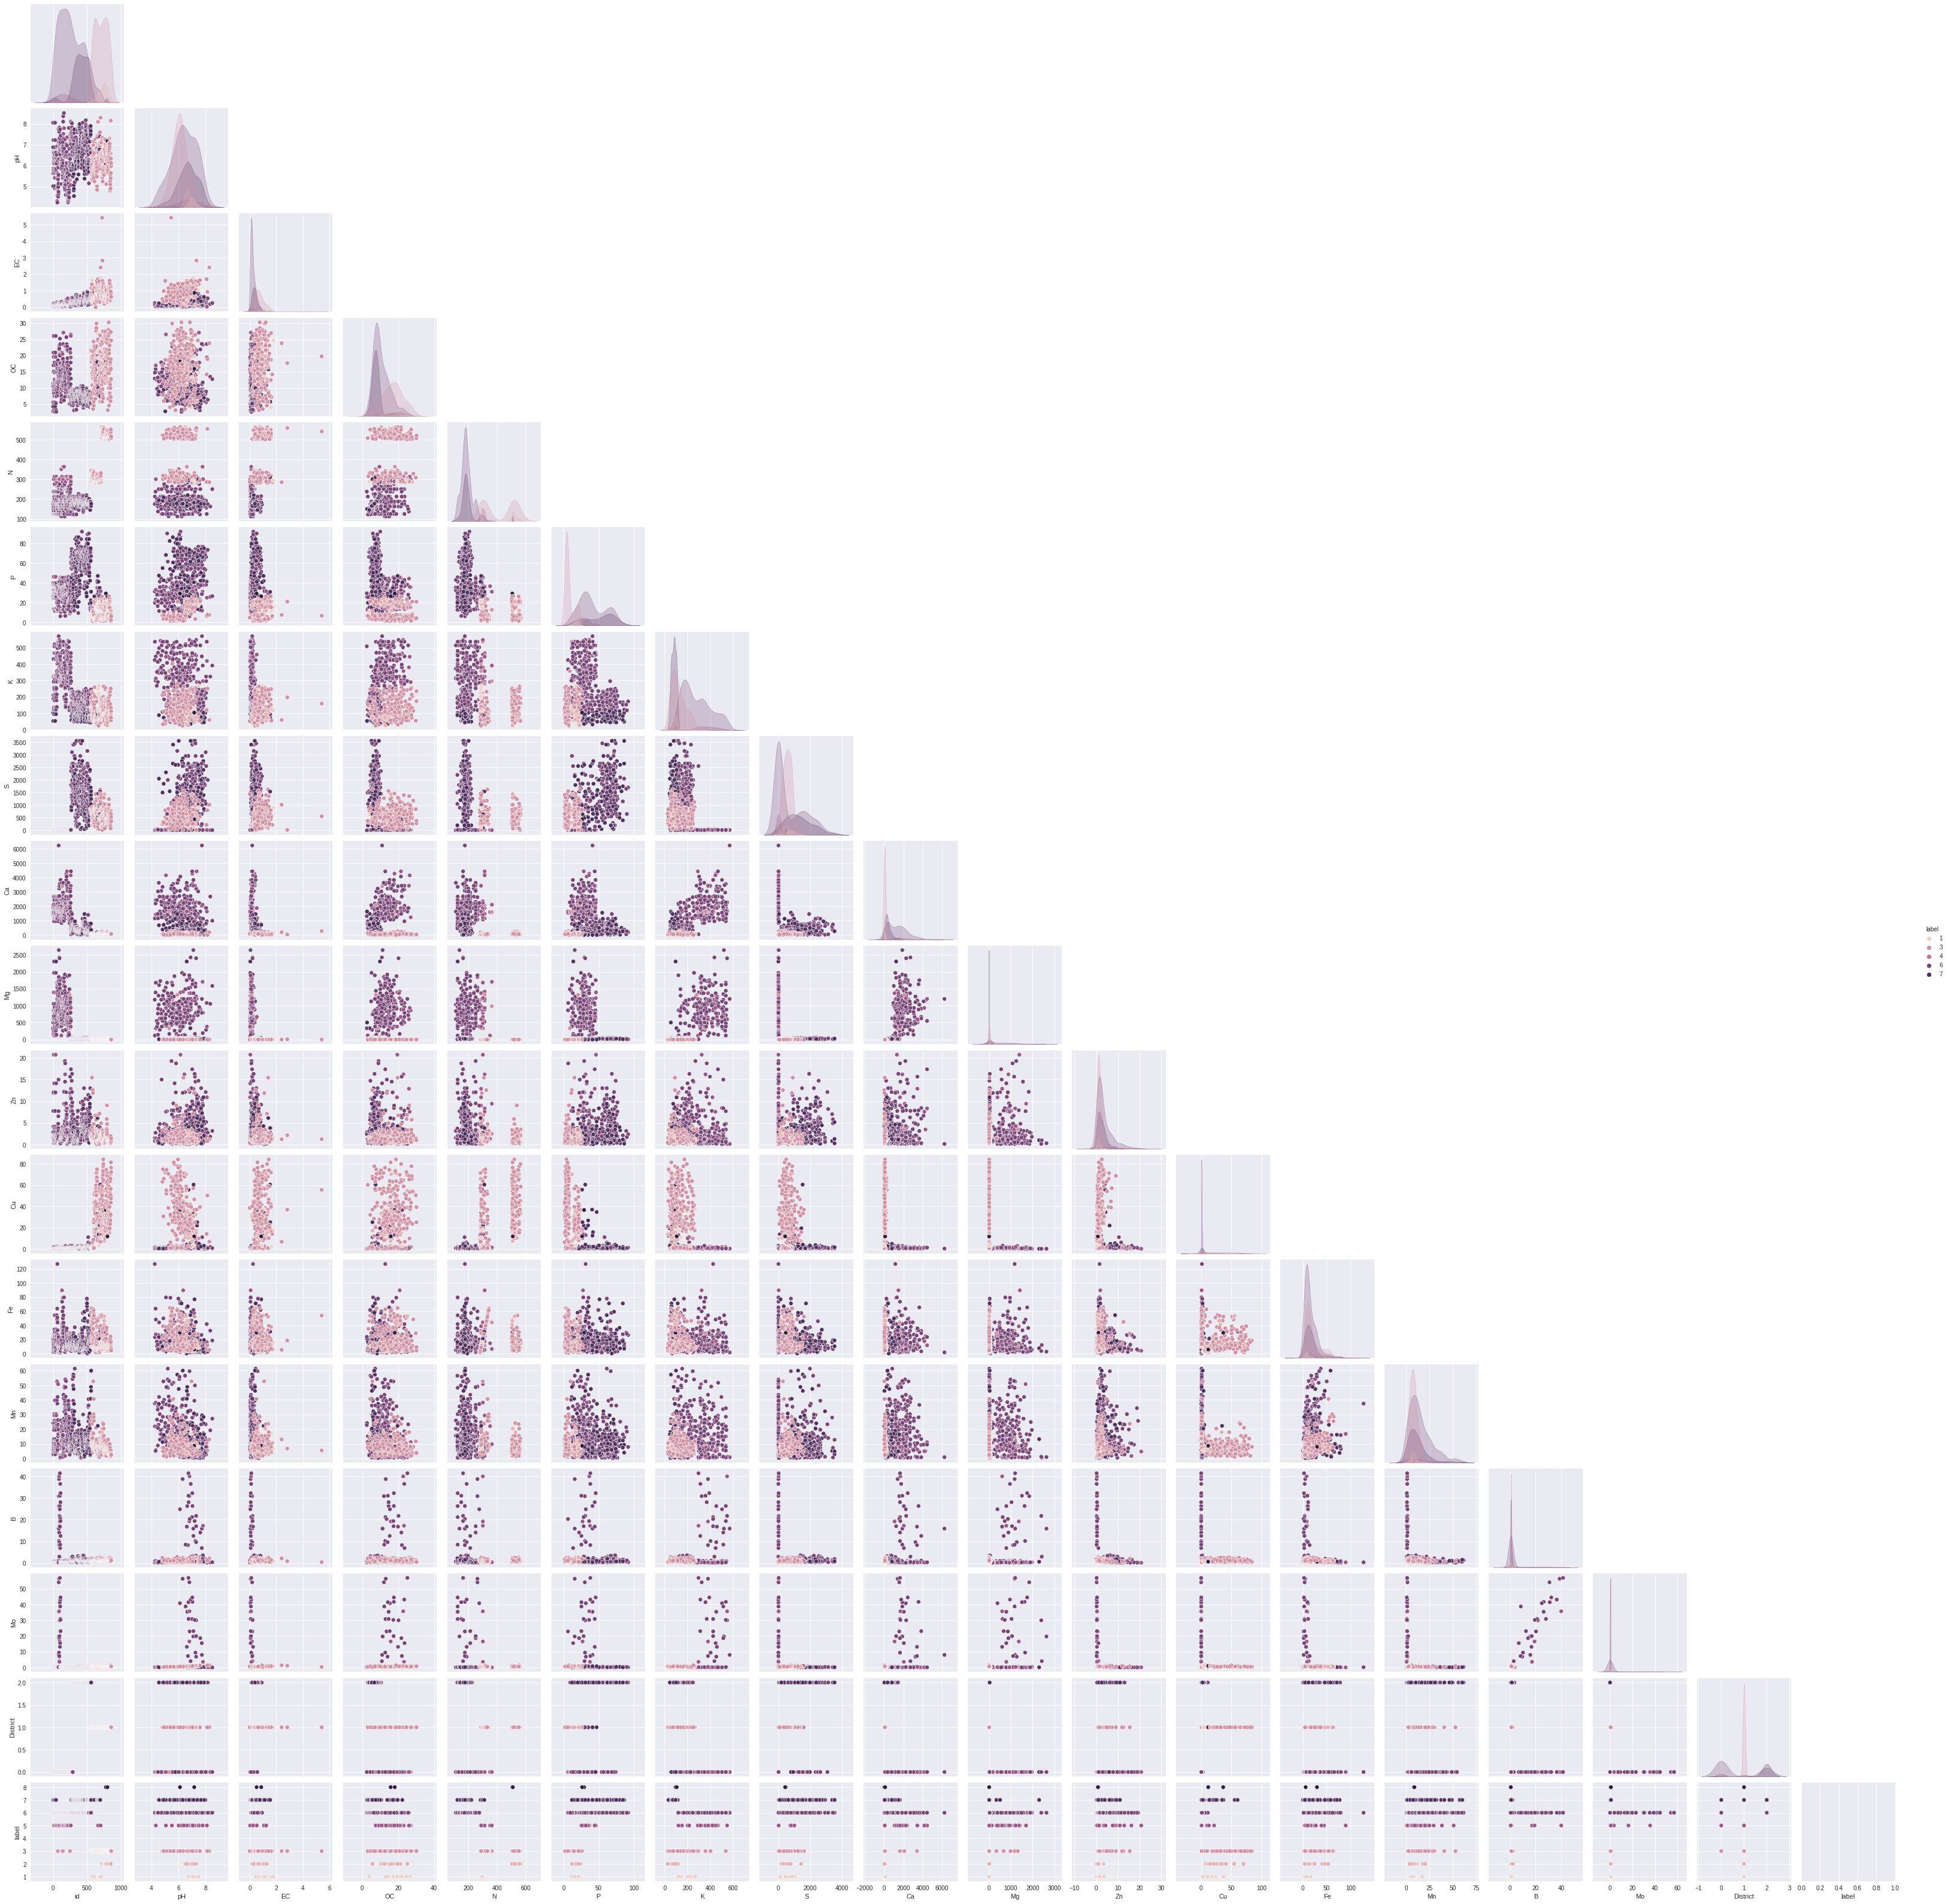

In [ ]:
g = sns.pairplot(data=df, 
                 vars=df.columns, 
                 hue='label',            
                 corner=True)

In [ ]:
X = df[['pH', 'EC', 'OC', 'N', 'P', 'K', 'S', 'Ca', 'Mg', 'Zn', 'Cu',
       'Fe', 'Mn', 'B', 'Mo','District']]
Y = df['label']

In [ ]:
X

,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,B,Mo,District
0,8.05,0.160,5.56,175.62,38.26,324.8,5.21,1884,288.00,1.82,0.20,2.83,2.80,0.23,0.13,0
1,6.88,0.089,4.24,125.44,26.30,103.0,10.42,1484,336.00,1.62,0.45,6.27,5.60,0.23,0.04,0
2,5.02,0.081,2.78,150.53,25.70,53.8,7.81,1644,504.00,2.84,0.44,21.08,24.11,0.23,0.09,0
3,5.64,0.164,10.54,188.16,24.70,190.4,10.42,1364,840.00,7.74,0.63,16.42,11.40,0.23,0.21,0
4,7.22,0.167,11.41,163.07,40.00,210.6,10.42,2004,168.00,11.89,0.61,7.38,2.91,0.12,0.26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,6.34,0.750,27.28,551.71,1.63,134.6,660.00,72,2.39,0.59,43.50,9.10,1.86,1.66,0.55,1
856,5.65,0.590,15.91,508.41,5.64,57.6,400.00,96,5.13,1.15,81.44,16.68,1.86,1.12,0.45,1
857,6.08,0.640,24.48,509.09,2.82,74.5,460.00,60,2.52,0.83,47.46,7.92,3.10,1.08,0.64,1
858,5.98,0.600,12.77,508.75,7.56,110.2,540.00,96,5.40,1.26,76.42,6.16,3.10,1.69,0.45,1


In [ ]:
Y

0      6
1      7
2      7
3      6
4      6
      ..
855    3
856    3
857    3
858    3
859    3
Name: label, Length: 860, dtype: int64

In [ ]:
X.pop('District')

0      0
1      0
2      0
3      0
4      0
      ..
855    1
856    1
857    1
858    1
859    1
Name: District, Length: 860, dtype: int64

In [ ]:
X = (X - X.mean())/X.std()
X

,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,B,Mo
0,2.026111,-0.717308,-1.150266,-0.707827,0.251631,0.989334,-0.940037,1.172686,0.003811,-0.314595,-0.589935,-0.977992,-0.886743,-0.308066,-0.195383
1,0.576584,-0.891618,-1.371417,-1.097930,-0.263046,-0.697078,-0.933532,0.749718,0.102799,-0.380138,-0.577238,-0.747099,-0.624629,-0.308066,-0.211145
2,-1.727792,-0.911258,-1.616023,-0.902879,-0.288866,-1.071160,-0.936790,0.918905,0.449259,0.019673,-0.577746,0.246949,1.108133,-0.308066,-0.202388
3,-0.959667,-0.707488,-0.315923,-0.610340,-0.331899,-0.032549,-0.933532,0.622827,1.142179,1.625470,-0.568096,-0.065830,-0.081678,-0.308066,-0.181372
4,0.997814,-0.700123,-0.170165,-0.805392,0.326509,0.121037,-0.933532,1.299577,-0.243661,2.985483,-0.569112,-0.672595,-0.876445,-0.334376,-0.172615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,-0.092429,0.731177,2.488673,2.215923,-1.324675,-0.456813,-0.122458,-0.743361,-0.585192,-0.717683,1.609204,-0.557149,-0.974738,0.033964,-0.121826
856,-0.947278,0.338367,0.583759,1.879306,-1.152112,-1.042267,-0.447097,-0.717983,-0.579542,-0.534164,3.536116,-0.048379,-0.974738,-0.095194,-0.139340
857,-0.414546,0.461120,2.019565,1.884593,-1.273466,-0.913772,-0.372180,-0.756050,-0.584924,-0.639032,1.810326,-0.636350,-0.858659,-0.104762,-0.106064
858,-0.538437,0.362918,0.057688,1.881949,-1.069488,-0.642334,-0.272291,-0.717983,-0.578985,-0.498115,3.281159,-0.754482,-0.858659,0.041139,-0.139340


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(688, 15) (172, 15) (688,) (172,)


In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, InputLayer

In [ ]:
hp_hidden_units = 128
hp_epoch = 100
hp_batch_size = 5
hp_lr = float(1/10)



In [ ]:
l1 = Dense(100)
l2 = Dense(hp_hidden_units, activation = tf.nn.sigmoid)
l3 = Dense(60, activation = tf.nn.relu)
l4 = Dense(50, activation = tf.nn.relu)
l5 = Dense(100, activation = tf.nn.sigmoid)
m1 = keras.models.Sequential(
    [l1, l2, l3, l4, l5]
)

In [ ]:
m1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           optimizer='adam',
           metrics=["accuracy"])



In [ ]:
history1 =m1.fit(X_train, y_train, batch_size= hp_batch_size, epochs=hp_epoch, validation_split=0.2,
                 verbose=1)

Epoch 1/100
110/110 [==============================] - 1s 5ms/step - loss: 3.8981 - accuracy: 0.4400 - val_loss: 3.7095 - val_accuracy: 0.3986
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 3.6979 - accuracy: 0.4655 - val_loss: 3.6975 - val_accuracy: 0.3986
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 3.6892 - accuracy: 0.4655 - val_loss: 3.6945 - val_accuracy: 0.3986
Epoch 4/100
110/110 [==============================] - 0s 4ms/step - loss: 3.6842 - accuracy: 0.5509 - val_loss: 3.7271 - val_accuracy: 0.7174
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 3.6848 - accuracy: 0.6491 - val_loss: 3.6809 - val_accuracy: 0.6232
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 3.6785 - accuracy: 0.5491 - val_loss: 3.6851 - val_accuracy: 0.5362
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 3.6759 - accuracy: 0.6091 - val_loss: 3.6942 - val_accuracy: 0.6304

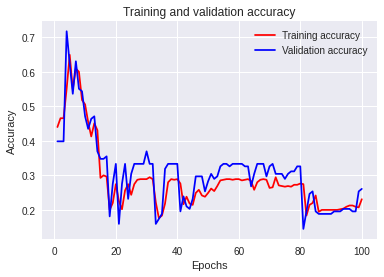

In [ ]:
history_dict = history1.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot

# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

[8.45353787e-10 7.27900726e-12 9.99989331e-01 1.00000000e+00
 1.08204565e-08 3.52428696e-22 9.21346240e-21 1.00000000e+00
 1.22324298e-06 1.33356173e-11 3.17174620e-10 1.58697274e-11
 1.71955550e-09 8.24348159e-11 4.77613560e-10 1.15257540e-10
 9.91615567e-10 7.01518343e-10 1.97391459e-09 2.43450882e-09
 7.48968335e-12 1.87745730e-09 5.92828911e-11 8.17225931e-09
 5.35264819e-11 8.93655316e-10 2.05967104e-10 1.68579595e-11
 1.93782004e-08 1.67297703e-11 3.07164294e-09 1.17509558e-09
 6.51665832e-10 1.63287744e-10 1.29499644e-09 1.08563625e-12
 1.46610675e-11 7.43561324e-11 3.06149030e-12 5.60908098e-10
 1.46139893e-12 2.75875850e-10 2.03738537e-09 1.78290904e-09
 8.99211747e-11 1.61451352e-09 2.50394705e-10 2.50790122e-09
 1.55529799e-12 8.25881030e-11 1.01187517e-10 6.71389833e-09
 1.00063080e-09 7.73011863e-11 5.40933270e-11 2.49671728e-10
 6.55937171e-09 4.27279739e-11 1.17703477e-11 2.08317086e-10
 9.17665683e-12 1.04969666e-09 5.06156728e-10 2.70979406e-10
 3.61721653e-09 4.103624

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


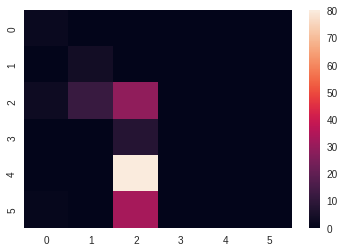

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.color_palette("Set2")
preds = m1.predict(X_test) 
print(preds[0]) 
print(np.sum(preds[0])) 

matrix = confusion_matrix(y_test, preds.argmax(axis=1))
matrix
print(classification_report(y_test, preds.argmax(axis=1)))
sns.heatmap(matrix)

In [ ]:
# Model 2

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)

dummy_y = np_utils.to_categorical(encoded_Y)

print(encoded_Y)


print(dummy_y)

[2 2 4 4 4 4 4 4 5 2 2 4 2 4 4 2 4 4 4 2 4 2 4 4 5 4 2 4 4 2 4 4 5 1 2 4 2
 4 2 4 2 4 4 4 4 4 4 2 3 4 4 2 4 4 5 2 2 4 4 2 1 4 5 4 2 1 4 4 4 0 3 2 5 4
 2 2 2 5 4 5 4 4 4 2 5 4 2 2 2 2 4 2 4 4 3 4 4 4 4 2 4 4 2 4 5 2 4 4 3 4 1
 4 2 2 2 1 2 5 4 2 2 4 5 5 5 5 4 5 4 4 5 2 4 4 4 2 2 2 2 2 4 5 5 2 5 1 4 4
 4 4 3 2 4 2 4 2 5 2 2 4 4 2 5 4 4 4 4 5 4 2 4 4 4 4 4 4 2 2 5 5 2 3 2 2 2
 3 4 2 5 4 5 5 0 1 5 4 2 2 4 2 4 4 5 2 5 5 2 2 4 5 4 5 4 4 4 4 4 5 4 2 2 5
 4 4 2 5 5 4 2 4 4 4 2 2 4 2 5 4 4 4 1 5 2 4 4 2 4 4 4 4 2 5 4 5 4 0 5 5 4
 4 4 5 4 4 3 5 4 3 5 4 4 3 4 4 4 2 2 4 3 5 5 2 4 2 5 5 5 2 5 4 4 2 5 4 5 4
 2 2 4 5 5 4 4 2 2 2 4 2 4 5 2 4 3 4 4 2 5 2 4 2 4 4 4 5 2 4 2 2 2 4 5 5 4
 2 4 1 2 4 4 4 4 5 5 4 4 4 4 4 2 5 4 4 4 2 4 2 2 4 4 2 4 4 4 2 4 4 4 4 5 2
 2 2 4 4 5 5 5 4 4 4 2 2 4 4 4 2 2 4 2 3 3 4 5 2 4 5 3 4 2 2 3 2 2 4 2 4 2
 5 4 4 5 4 5 3 4 4 5 4 1 5 2 4 4 4 5 4 2 2 4 5 4 5 4 2 4 2 2 3 4 4 2 4 4 4
 2 4 1 4 4 3 2 2 4 4 4 2 2 2 4 4 5 4 2 4 4 4 4 4 5 4 4 5 5 5 5 1 4 2 1 3 4
 5 2 4 2 4 4 4 2 4 2 2 5 

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense
# build a model
model = Sequential()
model.add(Dense(40, input_shape=(X_train.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(35, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 40)                640       
                                                                 
 dense_6 (Dense)             (None, 35)                1435      
                                                                 
 dense_7 (Dense)             (None, 25)                900       
                                                                 
 dense_8 (Dense)             (None, 20)                520       
                                                                 
 dense_9 (Dense)             (None, 7)                 147       
                                                                 
Total params: 3,642
Trainable params: 3,642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X_train,
                    dummy_y,
                    callbacks=[es],
                    epochs=50, # you can set this to a big number!
                    batch_size=3,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
184/184 [==============================] - 1s 3ms/step - loss: 1.2313 - accuracy: 0.5982 - val_loss: 0.8958 - val_accuracy: 0.7754
Epoch 2/50
184/184 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.8109 - val_loss: 0.4748 - val_accuracy: 0.8696
Epoch 3/50
184/184 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.8545 - val_loss: 0.4294 - val_accuracy: 0.8696
Epoch 4/50
184/184 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8509 - val_loss: 0.3832 - val_accuracy: 0.8841
Epoch 5/50
184/184 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8636 - val_loss: 0.3343 - val_accuracy: 0.8768
Epoch 6/50
184/184 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.8782 - val_loss: 0.4178 - val_accuracy: 0.8188
Epoch 7/50
184/184 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8873 - val_loss: 0.3366 - val_accuracy: 0.8768
Epoch 

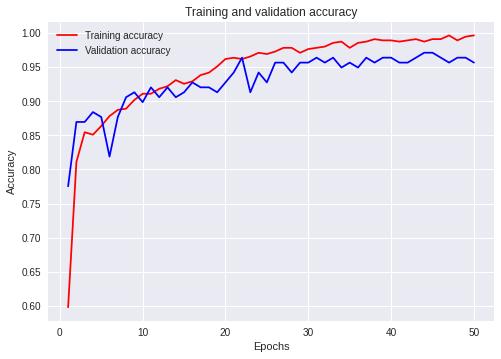

In [ ]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot

# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X_train) 
print(preds[0]) 
print(np.sum(preds[0])) 

matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
matrix
print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))


[1.0365702e-09 5.4380475e-06 9.9999118e-01 2.0114297e-11 5.9028760e-10
 3.3460815e-06 6.0559912e-13]
0.99999994
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.86      1.00      0.93        19
           2       0.99      0.99      0.99       199
           3       0.88      1.00      0.94        23
           4       1.00      0.99      0.99       316
           5       0.97      0.98      0.98       123
           6       0.00      0.00      0.00         1

    accuracy                           0.98       688
   macro avg       0.82      0.79      0.79       688
weighted avg       0.98      0.98      0.98       688



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
p2 = model.predict([X_test])

In [ ]:
p2.argmax

<function ndarray.argmax>

In [ ]:
p2

array([[4.52692111e-05, 1.73527260e-05, 9.99738276e-01, ...,
        9.76411982e-08, 1.98944210e-04, 4.09500478e-09],
       [1.36552891e-03, 2.53101898e-04, 8.06761980e-01, ...,
        7.75186782e-05, 1.91504657e-01, 3.08048442e-07],
       [4.27042587e-15, 1.00477138e-09, 1.00000000e+00, ...,
        3.08069556e-17, 4.58473060e-12, 1.22323776e-20],
       ...,
       [9.44276743e-33, 0.00000000e+00, 8.28154884e-28, ...,
        1.00000000e+00, 3.68015593e-16, 0.00000000e+00],
       [1.73860986e-04, 1.58240698e-09, 4.09389322e-05, ...,
        5.46800971e-01, 2.03887685e-04, 2.88079456e-13],
       [2.33645145e-14, 3.10284573e-24, 1.15506264e-13, ...,
        1.00000000e+00, 3.34642678e-08, 4.39932088e-28]], dtype=float32)

In [ ]:
import numpy as np
p1_reduced = [np.argmax(pr) for pr in p2]
p1_reduced[58]

5

In [ ]:
from sklearn.metrics import accuracy_score
print("Model 1: " + str(accuracy_score(p1_reduced, y_test)))

Model 1: 0.0


In [ ]:
p1_reduced

[2,
 2,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 2,
 2,
 4,
 4,
 5,
 2,
 3,
 0,
 5,
 4,
 2,
 4,
 4,
 2,
 2,
 2,
 4,
 4,
 2,
 2,
 2,
 1,
 2,
 5,
 1,
 5,
 4,
 4,
 4,
 2,
 4,
 1,
 2,
 4,
 5,
 5,
 2,
 4,
 4,
 4,
 4,
 4,
 5,
 2,
 4,
 5,
 4,
 5,
 2,
 4,
 4,
 2,
 5,
 5,
 2,
 4,
 4,
 4,
 4,
 5,
 2,
 2,
 2,
 4,
 4,
 2,
 2,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 5,
 2,
 5,
 2,
 4,
 4,
 5,
 5,
 2,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 5,
 4,
 4,
 5,
 5,
 2,
 5,
 2,
 5,
 4,
 5,
 2,
 2,
 4,
 2,
 5,
 5,
 5,
 2,
 2,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 1,
 4,
 5,
 2,
 2,
 4,
 5,
 2,
 5,
 3,
 4,
 4,
 4,
 5,
 4,
 4,
 2,
 3,
 4,
 4,
 4,
 4,
 2,
 5,
 5,
 5,
 2,
 4,
 5,
 4,
 4,
 5,
 4,
 5,
 4,
 2,
 5,
 4,
 2,
 4,
 4,
 4]